In [87]:
import math
import torch
import gpytorch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import emcee

import GPE_ensemble as GPE

import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#from GPErks.gp.data.dataset import Dataset
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.means import LinearMean
from gpytorch.kernels import RBFKernel, ScaleKernel
from torchmetrics import MeanSquaredError, R2Score
#from GPErks.gp.experiment import GPExperiment
#from GPErks.train.emulator import GPEmulator
#from GPErks.perks.inference import Inference
#from GPErks.train.early_stop import NoEarlyStoppingCriterion
#from GPErks.train.early_stop import (
#    GLEarlyStoppingCriterion,
#    PQEarlyStoppingCriterion,
#    UPEarlyStoppingCriterion,
#)
#from GPErks.train.early_stop import PkEarlyStoppingCriterion



%matplotlib inline
%load_ext autoreload
%autoreload 2

# set logger and enforce reproducibility
#from GPErks.log.logger import get_logger
#from GPErks.utils.random import set_seed
#log = get_logger()
seed = 7
#set_seed(seed)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
def computeResponse(delta,length,time,u,k_0,R):        
        """
        Computes concentrations.
        Arguments:
         source == forcing function (shape: Nt x Nx x Ny). Can either be generated by ... or determine manually.
         enforce_nonnegative = default False,. Setting to true will force concentration to be non-negative each iteration.
        returns array of concentrations (shape: Nt x Nx x Ny), given source. (also saved it in self.concentration)
        """
        #source = self.source
        
        #get the grid step sizes, their squares and the size of the grid
        
        dt = delta[0]
        dx = delta[1]
        dx2 = dx**2
        Nt = int(time/dt)
        Nx = int(length/dx)
        
        source = np.zeros((Nt,Nx))
        source[0,:]=np.sin(np.linspace(0,length,Nx))*100+100
        c=np.zeros((Nt,Nx))
        u=[u[0]*np.ones((Nt,Nx)),u[1]*np.ones((Nt,Nx))]
        c[0,:]=0

        for i in range(0,Nt-1):
            # Corner BCs 
            c[i+1,0]=0
            c[i+1,Nx-1]=0
            #for k in range(1,Ny-1):
                # Internal Calc
            c[i+1,1:Nx-1]=c[i,1:Nx-1] +dt*(source[i,1:Nx-1]-R*c[i,1:Nx-1]-u[0][i,1:Nx-1]*(c[i,2:Nx]-c[i,0:Nx-2])/(2*dx) +k_0*(c[i,2:Nx]-2*c[i,1:Nx-1]  +c[i,0:Nx-2])/dx2)

        concentration = c 
        
        return c

In [89]:
adr=computeResponse([0.002,0.01],10,10,u=[0.01,0.05],k_0=0.01,R=0.1)

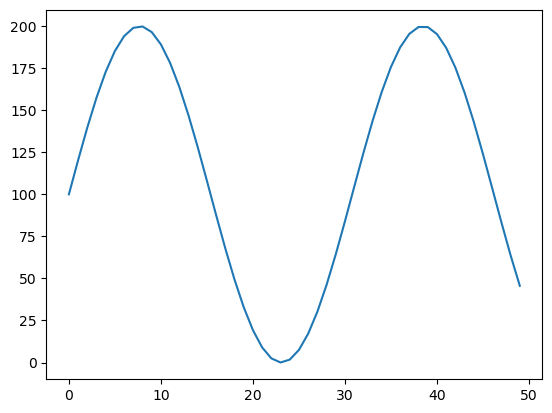

In [90]:
plt.plot(np.sin(np.linspace(0,10,50))*100+100)

In [91]:
x=np.linspace(0,10,int(10/0.01))
t=np.linspace(0,10,int(10/0.002))

Text(0, 0.5, 't')

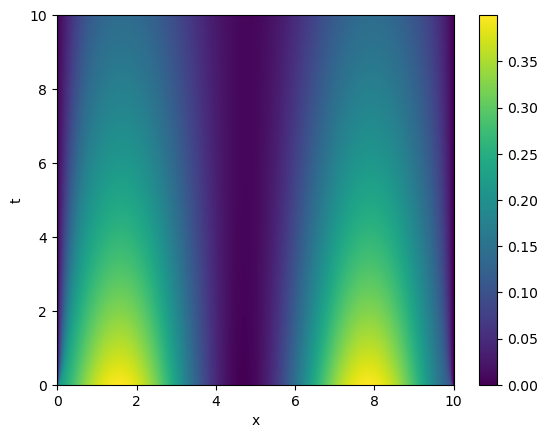

In [92]:
plt.pcolor(x,t,adr)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')

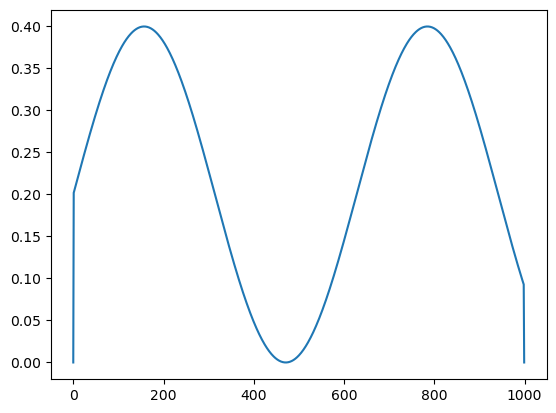

In [93]:
plt.plot(adr[1])

In [94]:
def computeResponse(delta,length,time,latent):       
        """
        Computes concentrations.
        Arguments:
         source == forcing function (shape: Nt x Nx x Ny). Can either be generated by ... or determine manually.
         enforce_nonnegative = default False,. Setting to true will force concentration to be non-negative each iteration.
        returns array of concentrations (shape: Nt x Nx x Ny), given source. (also saved it in self.concentration)
        """
        #source = self.source
        
        #get the grid step sizes, their squares and the size of the grid
        
        dt = delta[0]
        dx = delta[1]
        dx2 = dx**2
        Nt = int(time/dt)
        Nx = int(length/dx)
        
        source = np.zeros((Nt,Nx))
        source[0,:]=np.sin(np.linspace(0,length,Nx))*100+100
        c=np.zeros((Nt,Nx))
        u=[latent[0]*np.ones((Nt,Nx)),latent[0]*np.ones((Nt,Nx))]
        c[0,:]=0
        k_0=latent[1]
        R=latent[2]
        for i in range(0,Nt-1):
            # Corner BCs 
            c[i+1,0]=0
            c[i+1,Nx-1]=0
            #for k in range(1,Ny-1):
                # Internal Calc
            c[i+1,1:Nx-1]=c[i,1:Nx-1] +dt*(source[i,1:Nx-1]-R*c[i,1:Nx-1]-u[0][i,1:Nx-1]*(c[i,2:Nx]-c[i,0:Nx-2])/(2*dx) +k_0*(c[i,2:Nx]-2*c[i,1:Nx-1]  +c[i,0:Nx-2])/dx2)

        concentration = c 
        
        return c
        return c 

In [95]:
import scipy.stats.qmc as qmc

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


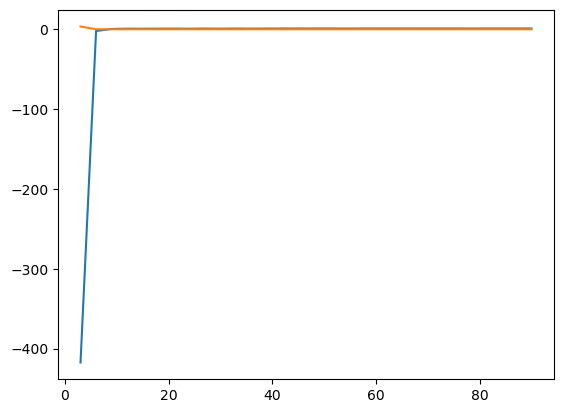

In [96]:
theta_sampler = qmc.LatinHypercube(d=2)
theta_sample = theta_sampler.random(n=500)

l_bounds = [0,0]
u_bounds = [10,10]
theta = qmc.scale(theta_sample, l_bounds, u_bounds)



theta1=(theta/[0.002,0.01]).astype(int)
y=adr[tuple(theta1.T)]


options = np.linspace(0,18)

X=torch.tensor(theta)
y=torch.tensor(y)
X_train_all, X_test, y_train_all, y_test = train_test_split(
    X,
    y,
    test_size=200,
    random_state=seed
)
nt=30
reps = 10
x=np.zeros(nt)
R2=np.zeros(nt)
MSE=np.zeros(nt)
for i in range(nt):
    for k in range(reps):
        # split original dataset in training, validation and testing sets
        X2=X_train_all
        y2=y_train_all
        X_train, X_test2, y_train, y_test2 = train_test_split(
            X2,
            y2,
            train_size=(i+1)*3,
            random_state=seed+i
        )
        x[i]=(i+1)*3
        emulator=GPE.ensemble(X_train,y_train[:,None],mean_func='linear')
        R2[i]+=emulator.R2(X_test,y_test[:,None])/reps
        MSE[i]+=emulator.MSE(X_test,y_test[:,None])/reps

plt.plot(x,R2)

plt.plot(x,MSE)

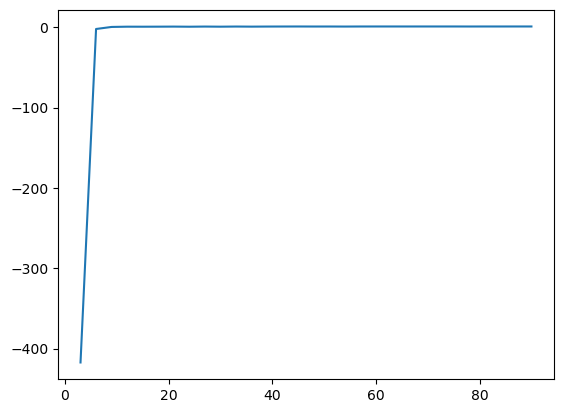

In [97]:

plt.plot(x,R2)



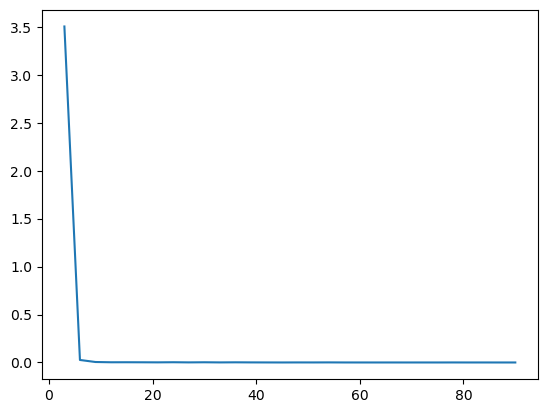

In [98]:
plt.plot(x,MSE)

In [99]:
nsamp=80

In [100]:
theta_sampler = qmc.LatinHypercube(d=2)
theta_sample = theta_sampler.random(n=nsamp)

In [101]:
l_bounds = [0,0]
u_bounds = [10,10]
theta = qmc.scale(theta_sample, l_bounds, u_bounds)

In [102]:
latent_sampler = qmc.LatinHypercube(d=3)
latent_sample = latent_sampler.random(n=18)

In [103]:
l_bounds = [-0.01,0.001,0]
u_bounds = [0.01,0.01,0.5]
latent = qmc.scale(latent_sample, l_bounds, u_bounds)

In [104]:
def computeResponse(delta,length,time,latent):       
        """
        Computes concentrations.
        Arguments:
         source == forcing function (shape: Nt x Nx x Ny). Can either be generated by ... or determine manually.
         enforce_nonnegative = default False,. Setting to true will force concentration to be non-negative each iteration.
        returns array of concentrations (shape: Nt x Nx x Ny), given source. (also saved it in self.concentration)
        """
        #source = self.source
        
        #get the grid step sizes, their squares and the size of the grid
        
        dt = delta[0]
        dx = delta[1]
        dx2 = dx**2
        Nt = int(time/dt)
        Nx = int(length/dx)
        
        source = np.zeros((Nt,Nx))
        source[0,:]=np.sin(np.linspace(0,length,Nx))*100+100
        c=np.zeros((Nt,Nx))
        u=[latent[0]*np.ones((Nt,Nx)),latent[0]*np.ones((Nt,Nx))]
        c[0,:]=0
        k_0=latent[1]
        R=latent[2]
        for i in range(0,Nt-1):
            # Corner BCs 
            c[i+1,0]=0
            c[i+1,Nx-1]=0
            #for k in range(1,Ny-1):
                # Internal Calc
            c[i+1,1:Nx-1]=c[i,1:Nx-1] +dt*(source[i,1:Nx-1]-R*c[i,1:Nx-1]-u[0][i,1:Nx-1]*(c[i,2:Nx]-c[i,0:Nx-2])/(2*dx) +k_0*(c[i,2:Nx]-2*c[i,1:Nx-1]  +c[i,0:Nx-2])/dx2)

        concentration = c 
        
        return c
        return c 

In [105]:
theta

array([[8.58343715, 3.38564293],
       [8.92445981, 7.74480914],
       [6.64160069, 2.78164941],
       [7.44185289, 6.03249428],
       [6.89142023, 7.38646753],
       [3.82977041, 0.591982  ],
       [5.60591926, 0.38116448],
       [0.9158697 , 2.59927205],
       [0.55045438, 8.66694897],
       [9.18766468, 9.68435149],
       [0.81657915, 9.04003385],
       [9.5181667 , 5.48201331],
       [8.25358259, 6.17755283],
       [1.86736601, 9.33258575],
       [7.72346585, 3.67142144],
       [2.21881287, 7.3051795 ],
       [1.72653745, 4.63660413],
       [5.94411   , 6.70465612],
       [5.41247422, 4.36681967],
       [3.14488741, 6.30663191],
       [2.6853807 , 8.81468015],
       [4.42301732, 3.50470347],
       [4.2781278 , 0.29305071],
       [6.59039885, 2.32712743],
       [2.61912469, 7.10837021],
       [4.62537445, 5.05632105],
       [7.29357189, 6.43033162],
       [3.50210744, 2.64532355],
       [9.75073348, 5.33913234],
       [0.13712922, 0.90437534],
       [8.

In [106]:
latent[0]

array([-0.00207527,  0.008189  ,  0.13213038])

In [107]:
y = np.zeros(180)
response=computeResponse([0.002,0.01,0.01],10,10,latent[0])
theta1=(theta/[0.002,0.01]).astype(int)
y=response[tuple(theta1.T)]
    

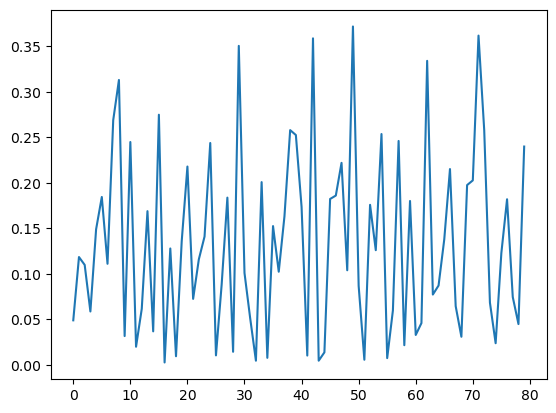

In [108]:
plt.plot(y)

In [109]:
# split original dataset in training, validation and testing sets
X=torch.tensor(theta)
y=torch.tensor(y)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=seed
)

In [110]:
emulator=GPE.ensemble(X_train,y_train[:,None],mean_func='linear')

0


In [111]:
emulator.R2(X_test,y_test[:,None])

tensor([0.9355], dtype=torch.float64, grad_fn=<RsubBackward1>)

In [112]:
emulator.predict(X_test)

tensor([[0.3180],
        [0.0777],
        [0.1179],
        [0.1330],
        [0.0035],
        [0.0596],
        [0.1996],
        [0.2605],
        [0.1821],
        [0.1174],
        [0.1722],
        [0.1643],
        [0.0168],
        [0.1000],
        [0.3194],
        [0.0736]], grad_fn=<PermuteBackward0>)

In [113]:
y_test

tensor([0.3339, 0.1023, 0.0329, 0.1279, 0.0103, 0.0616, 0.1837, 0.2748, 0.1736,
        0.1098, 0.1631, 0.1689, 0.0238, 0.1010, 0.3717, 0.0773],
       dtype=torch.float64)

In [114]:
latent

array([[-2.07526918e-03,  8.18900322e-03,  1.32130381e-01],
       [ 7.05312580e-03,  9.87374976e-03,  4.56703893e-01],
       [-5.98959902e-03,  6.11270998e-03,  3.12780643e-01],
       [ 3.58438990e-03,  9.28378056e-03,  1.50820449e-02],
       [ 8.59206982e-03,  5.25157199e-03,  5.26388654e-02],
       [ 5.88809544e-04,  3.63152001e-03,  1.42903475e-01],
       [ 4.45302767e-03,  4.18549603e-03,  3.93567472e-01],
       [ 5.72822455e-03,  1.59161055e-03,  1.94181051e-01],
       [ 1.75234831e-03,  1.47591806e-03,  2.50414814e-01],
       [-1.71994194e-04,  7.49663833e-03,  3.52035201e-01],
       [-5.50019598e-03,  2.75081556e-03,  2.40146062e-01],
       [-3.68234334e-03,  6.93638069e-03,  6.02766900e-02],
       [ 2.46057812e-03,  2.17809577e-03,  4.84020776e-01],
       [-2.90291877e-03,  5.94948557e-03,  8.43527878e-02],
       [ 9.14707137e-03,  8.82933386e-03,  3.04402614e-01],
       [-8.64249346e-03,  7.94770632e-03,  4.35529027e-01],
       [-9.01242841e-03,  3.30261129e-03

In [115]:
inputs=[]
for i,l in enumerate(latent):
    theta_sampler = qmc.LatinHypercube(d=2)
    theta_sample = theta_sampler.random(n=nsamp)
    l_bounds = [1,1]
    u_bounds = [9, 9]
    theta = qmc.scale(theta_sample, l_bounds, u_bounds)
    theta = qmc.scale(theta_sample, l_bounds, u_bounds)
    inputs.append(theta)

In [116]:
outputs = []
for i,l in enumerate(latent):
    response = computeResponse([0.002,0.01,0.01],10,10,l)
    theta=(inputs[i]/[0.002,0.01]).astype(int)
    outputs.append(response[tuple(theta.T)])

In [117]:
y_train[:,None].shape

torch.Size([64, 1])

In [118]:
R2_mean = np.zeros((1,len(inputs)) )
R2_std = np.zeros((1,len(inputs))) 
for i in range(len(inputs)):
    
    # split original dataset in training, validation and testing sets
    X=torch.tensor(inputs[i]).float()
    y=torch.tensor(outputs[i]).float()
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y[:,None],
        test_size=0.2,
        random_state=seed
    )
    emulator=GPE.ensemble(X_train,y_train,mean_func='linear',training_iter=1000)
    mean,std=emulator.R2_sample(X_test,y_test,1000)
    R2_mean[:,i]=mean
    R2_std[:,i]=std

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [119]:
R2_mean.shape

(1, 18)

In [120]:
R2_mean

array([[0.78870678, 0.68196332, 0.75599241, 0.86923271, 0.83002621,
        0.78215456, 0.23499303, 0.80310303, 0.78451073, 0.74939948,
        0.85798556, 0.82421303, 0.3412241 , 0.70741141, 0.69366258,
        0.69063944, 0.78008753, 0.75548857]])

Text(0, 0.5, '$R^2$')

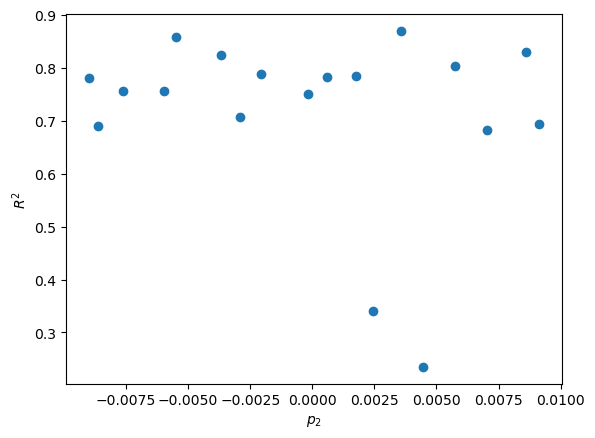

In [121]:
plt.plot(latent[:,0],R2_mean.T,'o')
plt.xlabel('$p_2$')
plt.ylabel('$R^2$')

In [122]:
R2_mean = np.zeros((1,len(inputs)) )
R2_std = np.zeros((1,len(inputs))) 
for i in range(len(inputs)):
    
    # split original dataset in training, validation and testing sets
    X=torch.tensor(inputs[i]).float()
    y=torch.tensor(outputs[i]).float()
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y[:,None],
        test_size=0.2,
        random_state=seed
    )
    emulator=GPE.ensemble(X_train,y_train,mean_func='linear',training_iter=1000)
    mean=emulator.R2(X_test,y_test)
    R2_mean[:,i]=mean.detach().numpy()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Text(0, 0.5, '$R^2$')

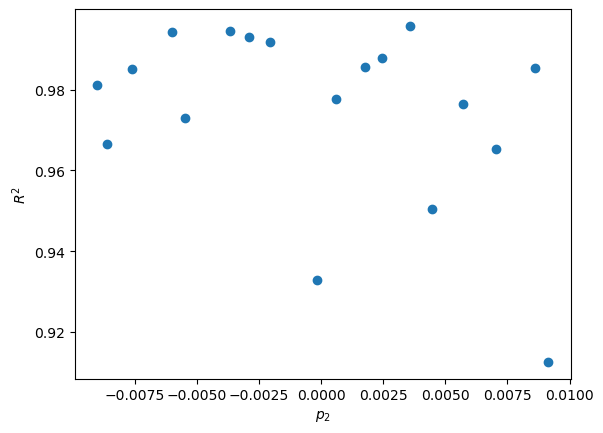

In [123]:
plt.plot(latent[:,0],R2_mean.T,'o')
plt.xlabel('$p_2$')
plt.ylabel('$R^2$')

In [124]:
np.array(inputs[0:17]).shape

(17, 80, 2)

In [125]:
inputs

[array([[3.09339054, 7.28581472],
        [1.44500298, 1.2240812 ],
        [5.84051685, 5.25751038],
        [7.40969418, 8.18794905],
        [3.3966907 , 3.93753939],
        [8.849906  , 6.00823526],
        [7.22410635, 1.68219094],
        [3.63480744, 2.37439341],
        [6.80816273, 4.15276516],
        [6.6169422 , 4.70707509],
        [2.80395451, 3.79822074],
        [5.94569795, 3.80572857],
        [6.03415353, 5.71325493],
        [1.39972513, 1.03785808],
        [4.81518242, 6.37264656],
        [8.69130603, 6.47994912],
        [7.79089495, 8.6194844 ],
        [6.51163855, 7.12395003],
        [2.7957209 , 4.46198086],
        [4.6754555 , 4.37843786],
        [8.00366999, 1.56892407],
        [4.35665577, 1.80784515],
        [7.64027736, 6.19049261],
        [4.787251  , 5.62020195],
        [7.81191669, 5.31053715],
        [1.51795249, 4.96505111],
        [4.94170931, 2.50189441],
        [7.07658633, 2.1113404 ],
        [2.57819465, 4.51830132],
        [5.732

In [126]:
large_input = np.array(inputs).reshape(18*nsamp,2)

modeweights = np.repeat(latent,nsamp,axis=0)

large_input = np.concatenate((large_input,modeweights),axis=1)

large_output = np.array(outputs).reshape(18*nsamp,1)

In [127]:
latent

array([[-2.07526918e-03,  8.18900322e-03,  1.32130381e-01],
       [ 7.05312580e-03,  9.87374976e-03,  4.56703893e-01],
       [-5.98959902e-03,  6.11270998e-03,  3.12780643e-01],
       [ 3.58438990e-03,  9.28378056e-03,  1.50820449e-02],
       [ 8.59206982e-03,  5.25157199e-03,  5.26388654e-02],
       [ 5.88809544e-04,  3.63152001e-03,  1.42903475e-01],
       [ 4.45302767e-03,  4.18549603e-03,  3.93567472e-01],
       [ 5.72822455e-03,  1.59161055e-03,  1.94181051e-01],
       [ 1.75234831e-03,  1.47591806e-03,  2.50414814e-01],
       [-1.71994194e-04,  7.49663833e-03,  3.52035201e-01],
       [-5.50019598e-03,  2.75081556e-03,  2.40146062e-01],
       [-3.68234334e-03,  6.93638069e-03,  6.02766900e-02],
       [ 2.46057812e-03,  2.17809577e-03,  4.84020776e-01],
       [-2.90291877e-03,  5.94948557e-03,  8.43527878e-02],
       [ 9.14707137e-03,  8.82933386e-03,  3.04402614e-01],
       [-8.64249346e-03,  7.94770632e-03,  4.35529027e-01],
       [-9.01242841e-03,  3.30261129e-03

In [128]:
latent2=latent.copy()
np.delete(latent2,0)

array([ 8.18900322e-03,  1.32130381e-01,  7.05312580e-03,  9.87374976e-03,
        4.56703893e-01, -5.98959902e-03,  6.11270998e-03,  3.12780643e-01,
        3.58438990e-03,  9.28378056e-03,  1.50820449e-02,  8.59206982e-03,
        5.25157199e-03,  5.26388654e-02,  5.88809544e-04,  3.63152001e-03,
        1.42903475e-01,  4.45302767e-03,  4.18549603e-03,  3.93567472e-01,
        5.72822455e-03,  1.59161055e-03,  1.94181051e-01,  1.75234831e-03,
        1.47591806e-03,  2.50414814e-01, -1.71994194e-04,  7.49663833e-03,
        3.52035201e-01, -5.50019598e-03,  2.75081556e-03,  2.40146062e-01,
       -3.68234334e-03,  6.93638069e-03,  6.02766900e-02,  2.46057812e-03,
        2.17809577e-03,  4.84020776e-01, -2.90291877e-03,  5.94948557e-03,
        8.43527878e-02,  9.14707137e-03,  8.82933386e-03,  3.04402614e-01,
       -8.64249346e-03,  7.94770632e-03,  4.35529027e-01, -9.01242841e-03,
        3.30261129e-03,  1.95910399e-01, -7.61586732e-03,  4.59740070e-03,
        3.74905905e-01])

In [129]:
latent2=latent.copy()
latent2=np.delete(latent2,0,axis=0)

In [130]:
latent2

array([[ 7.05312580e-03,  9.87374976e-03,  4.56703893e-01],
       [-5.98959902e-03,  6.11270998e-03,  3.12780643e-01],
       [ 3.58438990e-03,  9.28378056e-03,  1.50820449e-02],
       [ 8.59206982e-03,  5.25157199e-03,  5.26388654e-02],
       [ 5.88809544e-04,  3.63152001e-03,  1.42903475e-01],
       [ 4.45302767e-03,  4.18549603e-03,  3.93567472e-01],
       [ 5.72822455e-03,  1.59161055e-03,  1.94181051e-01],
       [ 1.75234831e-03,  1.47591806e-03,  2.50414814e-01],
       [-1.71994194e-04,  7.49663833e-03,  3.52035201e-01],
       [-5.50019598e-03,  2.75081556e-03,  2.40146062e-01],
       [-3.68234334e-03,  6.93638069e-03,  6.02766900e-02],
       [ 2.46057812e-03,  2.17809577e-03,  4.84020776e-01],
       [-2.90291877e-03,  5.94948557e-03,  8.43527878e-02],
       [ 9.14707137e-03,  8.82933386e-03,  3.04402614e-01],
       [-8.64249346e-03,  7.94770632e-03,  4.35529027e-01],
       [-9.01242841e-03,  3.30261129e-03,  1.95910399e-01],
       [-7.61586732e-03,  4.59740070e-03

In [131]:
R2_in = torch.zeros((18,1))
R2_out = torch.zeros((18,1))

for i in range(18):
    
    
    
    large_input = np.array(inputs[0:i]+inputs[i+1:18]).reshape(17*nsamp,2)

    latent2=latent.copy()
    latent2=np.delete(latent2,i,axis=0)

    modeweights = np.repeat(latent2,nsamp,axis=0)

    large_input = np.concatenate((large_input,modeweights),axis=1)

    large_output = np.array(outputs[0:i]+outputs[i+1:18]).reshape(17*nsamp,1)
    
    leftout_input=torch.tensor(np.concatenate((inputs[i],np.repeat(latent[[i]],nsamp,axis=0)),axis=1))
    leftout_output=torch.tensor(outputs[i])
    
    # split original dataset in training, validation and testing sets
    X=torch.tensor(large_input)
    y=torch.tensor(large_output)
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        train_size=720,
        random_state=seed
    )

    emulator=GPE.ensemble(X_train,y_train,mean_func='linear',training_iter=1000)

    R2_in[i]=emulator.R2(X_test,y_test)

    R2_out[i]=emulator.R2(leftout_input,leftout_output[:,None])
    print(R2_out[i])

0
tensor([0.9708], grad_fn=<SelectBackward0>)
0
tensor([0.9609], grad_fn=<SelectBackward0>)
0
tensor([0.9900], grad_fn=<SelectBackward0>)
0
tensor([0.9488], grad_fn=<SelectBackward0>)
0
tensor([0.9923], grad_fn=<SelectBackward0>)
0
tensor([0.9918], grad_fn=<SelectBackward0>)
0
tensor([0.9766], grad_fn=<SelectBackward0>)
0
tensor([0.9934], grad_fn=<SelectBackward0>)
0
tensor([0.9920], grad_fn=<SelectBackward0>)
0
tensor([0.9834], grad_fn=<SelectBackward0>)
0
tensor([0.9969], grad_fn=<SelectBackward0>)
0
tensor([0.9960], grad_fn=<SelectBackward0>)
0
tensor([0.9568], grad_fn=<SelectBackward0>)
0
tensor([0.9971], grad_fn=<SelectBackward0>)
0
tensor([0.9855], grad_fn=<SelectBackward0>)
0
tensor([0.9701], grad_fn=<SelectBackward0>)
0
tensor([0.9937], grad_fn=<SelectBackward0>)
0
tensor([0.9840], grad_fn=<SelectBackward0>)


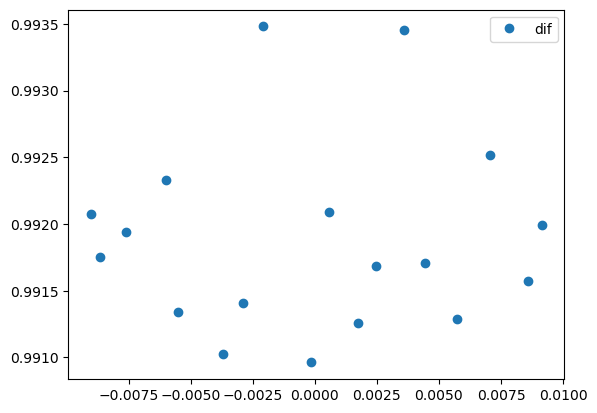

In [132]:
plt.plot(latent[:,0],R2_in.detach().numpy(),'o')
plt.legend(['dif','end','mean'])

Text(0, 0.5, '$R^2$')

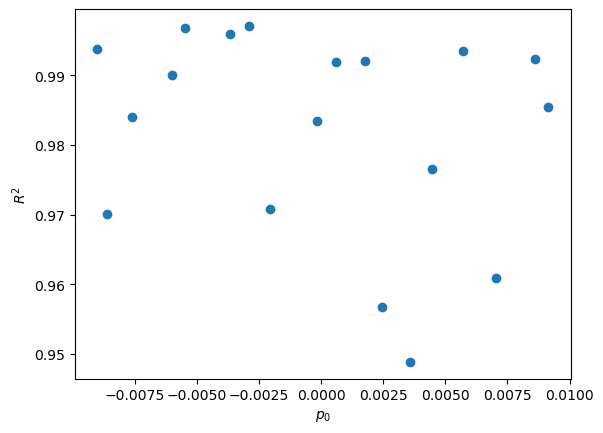

In [133]:
plt.plot(latent[:,0],R2_out[:,0].detach().numpy(),'o')
plt.xlabel('$p_0$')
plt.ylabel('$R^2$')

In [134]:
inputs.copy()

[array([[3.09339054, 7.28581472],
        [1.44500298, 1.2240812 ],
        [5.84051685, 5.25751038],
        [7.40969418, 8.18794905],
        [3.3966907 , 3.93753939],
        [8.849906  , 6.00823526],
        [7.22410635, 1.68219094],
        [3.63480744, 2.37439341],
        [6.80816273, 4.15276516],
        [6.6169422 , 4.70707509],
        [2.80395451, 3.79822074],
        [5.94569795, 3.80572857],
        [6.03415353, 5.71325493],
        [1.39972513, 1.03785808],
        [4.81518242, 6.37264656],
        [8.69130603, 6.47994912],
        [7.79089495, 8.6194844 ],
        [6.51163855, 7.12395003],
        [2.7957209 , 4.46198086],
        [4.6754555 , 4.37843786],
        [8.00366999, 1.56892407],
        [4.35665577, 1.80784515],
        [7.64027736, 6.19049261],
        [4.787251  , 5.62020195],
        [7.81191669, 5.31053715],
        [1.51795249, 4.96505111],
        [4.94170931, 2.50189441],
        [7.07658633, 2.1113404 ],
        [2.57819465, 4.51830132],
        [5.732

In [135]:
t_size = 60
reps = 5
MSE = np.zeros((18,17,3))
R2 = np.zeros((18,17,3))
for i in range(18):

    X0 = torch.tensor(inputs[i])
    Y0 = torch.tensor(outputs[i])[:,None]
    emulator_0 = GPE.ensemble(X0,Y0,mean_func="linear",training_iter=500)
    
    inputs2 = inputs.copy()
    inputs2.pop(i)
    outputs2 = outputs.copy()
    outputs2.pop(i)
    
    for j in (range(17)):
        inputData_1 = inputs2[j]
        outputData_1 = outputs2[j]

        X1 = torch.tensor(inputData_1)
        Y1 = torch.tensor(outputData_1)[:,None]
        # split original dataset in training, validation and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X1,
            Y1,
            test_size=0.1,
            random_state=seed
        )
        for k in range(reps):
            a=np.random.choice(range(X_train.shape[0]),t_size,replace=False)
            m0 = emulator_0.predict(X_train[a,:])
            y_adjust = torch.tensor(y_train[a] - m0)
            delta_1 = GPE.ensemble(X_train[a,:],y_adjust,mean_func="linear",training_iter=500)
            MSE[i,j,:] += np.sqrt(((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy())/reps
            R2[i,j,:] += (1-((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0)/torch.tensor(y_test.var(axis=0))).detach().numpy()/reps



0


/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_34446/2662425898.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_adjust = torch.tensor(y_train[a] - m0)


0


/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_34446/2662425898.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  MSE[i,j,:] += np.sqrt(((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy())/reps
/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_34446/2662425898.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  R2[i,j,:] += (1-((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0)/torch.tensor(y_test.var(axis=0))).detach().numpy()/reps


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [136]:
latent[:,0]

array([-0.00207527,  0.00705313, -0.0059896 ,  0.00358439,  0.00859207,
        0.00058881,  0.00445303,  0.00572822,  0.00175235, -0.00017199,
       -0.0055002 , -0.00368234,  0.00246058, -0.00290292,  0.00914707,
       -0.00864249, -0.00901243, -0.00761587])

In [137]:
R2.mean(axis=1)[:,2]

array([0.98686145, 0.99148137, 0.9922739 , 0.95643926, 0.97052732,
       0.98886069, 0.9921857 , 0.99092323, 0.99043924, 0.99108566,
       0.9923485 , 0.97652829, 0.99139662, 0.98237902, 0.992653  ,
       0.99050036, 0.99217509, 0.99211149])

Text(0, 0.5, '$R^2$')

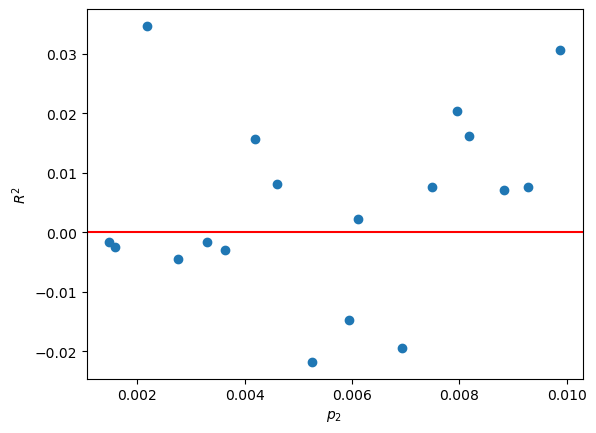

In [138]:
fig, ax = plt.subplots()


#ax.scatter(latent[:,0],R2.mean(axis=1)[:,0]-R2_out.detach().numpy()[:,0])
#ax.scatter(latent[:,0],R2.mean(axis=1)[:,1]-R2_out.detach().numpy()[:,1])
ax.scatter(latent[:,1],R2.mean(axis=1)[:,0]-R2_out.detach().numpy()[:,0])
#ax.scatter(latent[:,1],R2.mean(axis=1)[:, 0])
plt.axhline(y=0, color='r', linestyle='-')
#ax.scatter(latent[9:,0],R2_out.detach().numpy()[9:,2])

#ax.scatter(latent,R2.mean(axis=1)[:,1])
#ax.scatter(latent,R2_out.detach().numpy()[:,1])

#ax.scatter(latent,R2.mean(axis=1)[:,2])
#ax.scatter(latent,R2_out.detach().numpy()[:,2])

#plt.errorbar(latent,R2.mean(axis=1)[:,0],fmt='o',yerr=R2.std(axis=1)[:,0])


#ax.scatter(latent,R2.mean(axis=1)[:,1])
#plt.errorbar(latent,R2.mean(axis=1)[:,1],fmt='o',yerr=R2.std(axis=1)[:,1])


#ax.scatter(latent,R2.mean(axis=1)[:,2])
#plt.errorbar(latent,R2.mean(axis=1)[:,2],fmt='o',yerr=R2.std(axis=1)[:,2])



plt.xlabel('$p_2$')
plt.ylabel('$R^2$')

Text(0, 0.5, '$R^2$')

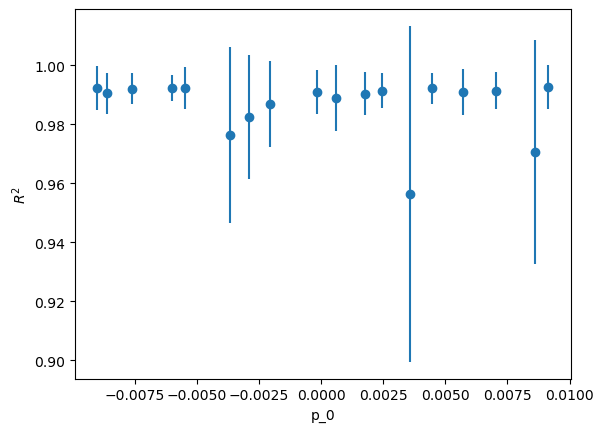

In [139]:

ax.scatter(latent[:,0],R2.mean(axis=1)[:,0])
plt.errorbar(latent[:,0],R2.mean(axis=1)[:,0],fmt='o',yerr=R2.std(axis=1)[:,0])



plt.xlabel('p_0')
plt.ylabel('$R^2$')
#plt.yscale('log')

In [140]:
def proxy(a,y_train,m0,output):
    a=torch.tensor(a)
    res = ((a*m0-y_train)**2).mean(axis=1).detach().numpy()
    return res[output]

In [141]:
import scipy

In [142]:
m0 = emulator_0.predict(X_train)

In [143]:
(y_train**2).mean()

tensor(0.0157, dtype=torch.float64)

In [144]:
result = scipy.optimize.minimize(proxy, 1, args=(y_train,m0,0), method='Nelder-Mead', tol=1e-8)

In [145]:
result

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.5280856569364697e-19
             x: [ 1.395e+00]
           nit: 28
          nfev: 56
 final_simplex: (array([[ 1.395e+00],
                       [ 1.395e+00]]), array([ 1.528e-19,  3.720e-19]))

In [146]:
proxy(result.x,y_train,m0,0)

1.5280856569364697e-19

In [147]:
X0 = torch.tensor(inputs[0])
Y0 = torch.tensor(outputs[0])[:,None]
emulator_0 = GPE.ensemble(X0,Y0,mean_func="linear",training_iter=500)

0


In [148]:
t_size = 60
reps = 5
MSE = np.zeros((18,17,3))
R2 = np.zeros((18,17,3))
for i in range(18):

    X0 = torch.tensor(inputs[i])
    Y0 = torch.tensor(outputs[i])[:,None]
    emulator_0 = GPE.ensemble(X0,Y0,mean_func="linear",training_iter=500)
    
    inputs2 = inputs.copy()
    inputs2.pop(i)
    outputs2 = outputs.copy()
    outputs2.pop(i)
    
    for j in (range(17)):
        inputData_1 = inputs2[j]
        outputData_1 = outputs2[j]

        X1 = torch.tensor(inputData_1)
        Y1 = torch.tensor(outputData_1)[:,None]
        # split original dataset in training, validation and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X1,
            Y1,
            test_size=0.1,
            random_state=seed
        )
        for k in range(reps):
            a=np.random.choice(range(X_train.shape[0]),t_size,replace=False)
            m0 = emulator_0.predict(X_train[a,:])
            a_d=np.zeros(y_train.shape[1])
            for l in range(y_train.shape[1]):
                result = scipy.optimize.minimize(proxy, 1, args=(y_train[a,:],m0,l), method='Nelder-Mead', tol=1e-8)
                print(result.x)
                a_d[l]=result.x

            a_d=torch.tensor(a_d)
            print(a_d)
            
            y_adjust = torch.tensor(y_train[a] - a_d*m0)
            delta_1 = GPE.ensemble(X_train[a,:],y_adjust,mean_func="linear",training_iter=500)
            MSE[i,j,:] += np.sqrt(((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy())/reps
            R2[i,j,:] += (1-((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0)/torch.tensor(y_test.var(axis=0))).detach().numpy()/reps



0
[0.06313527]
tensor([0.0631], dtype=torch.float64)
0


/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_34446/2990276855.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_adjust = torch.tensor(y_train[a] - a_d*m0)
/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_34446/2990276855.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  MSE[i,j,:] += np.sqrt(((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy())/reps
/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_34446/2990276855.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch

[0.33555526]
tensor([0.3356], dtype=torch.float64)
0
[0.09422218]
tensor([0.0942], dtype=torch.float64)
0
[0.0990382]
tensor([0.0990], dtype=torch.float64)
0
[0.32950827]
tensor([0.3295], dtype=torch.float64)
0
[0.43488864]
tensor([0.4349], dtype=torch.float64)
0
[0.32351339]
tensor([0.3235], dtype=torch.float64)
0
[0.25500574]
tensor([0.2550], dtype=torch.float64)
0
[0.46488981]
tensor([0.4649], dtype=torch.float64)
0
[0.47383394]
tensor([0.4738], dtype=torch.float64)
0
[2.13410076]
tensor([2.1341], dtype=torch.float64)
0
[1.80959518]
tensor([1.8096], dtype=torch.float64)
0
[1.3152725]
tensor([1.3153], dtype=torch.float64)
0
[2.06007715]
tensor([2.0601], dtype=torch.float64)
0
[1.31527327]
tensor([1.3153], dtype=torch.float64)
0
[1.72197223]
tensor([1.7220], dtype=torch.float64)
0
[2.05168468]
tensor([2.0517], dtype=torch.float64)
0
[1.25772393]
tensor([1.2577], dtype=torch.float64)
0
[1.75923707]
tensor([1.7592], dtype=torch.float64)
0
[1.28718648]
tensor([1.2872], dtype=torch.float6

[1.10691578]
tensor([1.1069], dtype=torch.float64)
0
[0.8900021]
tensor([0.8900], dtype=torch.float64)
0
[1.0351083]
tensor([1.0351], dtype=torch.float64)
0
[1.13537061]
tensor([1.1354], dtype=torch.float64)
0
[2.26346437]
tensor([2.2635], dtype=torch.float64)
0
[2.42669413]
tensor([2.4267], dtype=torch.float64)
0
[1.70147102]
tensor([1.7015], dtype=torch.float64)
0
[1.40113326]
tensor([1.4011], dtype=torch.float64)
0
[1.70147086]
tensor([1.7015], dtype=torch.float64)
0
[1.95307831]
tensor([1.9531], dtype=torch.float64)
0
[1.74934325]
tensor([1.7493], dtype=torch.float64)
0
[1.33560314]
tensor([1.3356], dtype=torch.float64)
0
[1.59661229]
tensor([1.5966], dtype=torch.float64)
0
[3.79033881]
tensor([3.7903], dtype=torch.float64)
0
0
[2.35581324]
tensor([2.3558], dtype=torch.float64)
0
[4.10899907]
tensor([4.1090], dtype=torch.float64)
0
[1.66116557]
tensor([1.6612], dtype=torch.float64)
0
[1.7103488]
tensor([1.7103], dtype=torch.float64)
0
[1.37868904]
tensor([1.3787], dtype=torch.float

[0.22244475]
tensor([0.2224], dtype=torch.float64)
0
[0.01608602]
tensor([0.0161], dtype=torch.float64)
0
[0.09108893]
tensor([0.0911], dtype=torch.float64)
0
[0.04982959]
tensor([0.0498], dtype=torch.float64)
0
[0.7601721]
tensor([0.7602], dtype=torch.float64)
0
[0.57739384]
tensor([0.5774], dtype=torch.float64)
0
[0.73924322]
tensor([0.7392], dtype=torch.float64)
0
[0.95374297]
tensor([0.9537], dtype=torch.float64)
0
[0.56928791]
tensor([0.5693], dtype=torch.float64)
0
[0.10823218]
tensor([0.1082], dtype=torch.float64)
0
[0.13322975]
tensor([0.1332], dtype=torch.float64)
0
[0.55294514]
tensor([0.5529], dtype=torch.float64)
0
[0.29250206]
tensor([0.2925], dtype=torch.float64)
0
[0.08427829]
tensor([0.0843], dtype=torch.float64)
0
[0.37415323]
tensor([0.3742], dtype=torch.float64)
0
[0.17973448]
tensor([0.1797], dtype=torch.float64)
0
[0.35480306]
tensor([0.3548], dtype=torch.float64)
0
[0.22750708]
tensor([0.2275], dtype=torch.float64)
0
[0.07233233]
tensor([0.0723], dtype=torch.float

[0.18289527]
tensor([0.1829], dtype=torch.float64)
0
[0.31180146]
tensor([0.3118], dtype=torch.float64)
0
[0.31180146]
tensor([0.3118], dtype=torch.float64)
0
[0.17876611]
tensor([0.1788], dtype=torch.float64)
0
[0.51177576]
tensor([0.5118], dtype=torch.float64)
0
[0.77577076]
tensor([0.7758], dtype=torch.float64)
0
[0.67468467]
tensor([0.6747], dtype=torch.float64)
0
[0.44497954]
tensor([0.4450], dtype=torch.float64)
0
[-0.21091951]
tensor([-0.2109], dtype=torch.float64)
0
[8.23510229]
tensor([8.2351], dtype=torch.float64)
0
[1.53697303]
tensor([1.5370], dtype=torch.float64)
0
[1.22708744]
tensor([1.2271], dtype=torch.float64)
0
[1.23293805]
tensor([1.2329], dtype=torch.float64)
0
[1.40185005]
tensor([1.4019], dtype=torch.float64)
0
[0.0575136]
tensor([0.0575], dtype=torch.float64)
0
[0.11817075]
tensor([0.1182], dtype=torch.float64)
0
[0.22817698]
tensor([0.2282], dtype=torch.float64)
0
[0.30399307]
tensor([0.3040], dtype=torch.float64)
0
[0.77863028]
tensor([0.7786], dtype=torch.flo

[1.09964117]
tensor([1.0996], dtype=torch.float64)
0
[1.19108316]
tensor([1.1911], dtype=torch.float64)
0
[1.23117984]
tensor([1.2312], dtype=torch.float64)
0
[-1.02105814]
tensor([-1.0211], dtype=torch.float64)
0
[0.29248503]
tensor([0.2925], dtype=torch.float64)
0
[0.24780934]
tensor([0.2478], dtype=torch.float64)
0
[0.25600082]
tensor([0.2560], dtype=torch.float64)
0
[0.21796505]
tensor([0.2180], dtype=torch.float64)
0
[0.41040615]
tensor([0.4104], dtype=torch.float64)
0
[0.68837527]
tensor([0.6884], dtype=torch.float64)
0
[1.07132965]
tensor([1.0713], dtype=torch.float64)
0
[0.66894867]
tensor([0.6689], dtype=torch.float64)
0
[0.74371276]
tensor([0.7437], dtype=torch.float64)
0
[0.6736299]
tensor([0.6736], dtype=torch.float64)
0
[0.31653417]
tensor([0.3165], dtype=torch.float64)
0
[0.75648651]
tensor([0.7565], dtype=torch.float64)
0
[0.44028487]
tensor([0.4403], dtype=torch.float64)
0
[0.88052487]
tensor([0.8805], dtype=torch.float64)
0
[0.75648999]
tensor([0.7565], dtype=torch.flo

[1.07235242]
tensor([1.0724], dtype=torch.float64)
0
[1.2598067]
tensor([1.2598], dtype=torch.float64)
0
[1.15567992]
tensor([1.1557], dtype=torch.float64)
0
[1.1671247]
tensor([1.1671], dtype=torch.float64)
0
[5.7479998]
tensor([5.7480], dtype=torch.float64)
0
[2.25604152]
tensor([2.2560], dtype=torch.float64)
0
[3.62462763]
tensor([3.6246], dtype=torch.float64)
0
[2.25604176]
tensor([2.2560], dtype=torch.float64)
0
[26.3090831]
tensor([26.3091], dtype=torch.float64)
0
[14.08263068]
tensor([14.0826], dtype=torch.float64)
0
[6.15408576]
tensor([6.1541], dtype=torch.float64)
0
[7.04983061]
tensor([7.0498], dtype=torch.float64)
0
[7.45959973]
tensor([7.4596], dtype=torch.float64)
0
[7.86526412]
tensor([7.8653], dtype=torch.float64)
0
[7.12031869]
tensor([7.1203], dtype=torch.float64)
0
[1.723966]
tensor([1.7240], dtype=torch.float64)
0
[1.46813277]
tensor([1.4681], dtype=torch.float64)
0
[2.35525604]
tensor([2.3553], dtype=torch.float64)
0
[3.30442206]
tensor([3.3044], dtype=torch.float6

[0.77892759]
tensor([0.7789], dtype=torch.float64)
0
[0.75129265]
tensor([0.7513], dtype=torch.float64)
0
[0.90233241]
tensor([0.9023], dtype=torch.float64)
0
[0.37824224]
tensor([0.3782], dtype=torch.float64)
0
0
[0.76557077]
tensor([0.7656], dtype=torch.float64)
0
[0.66392696]
tensor([0.6639], dtype=torch.float64)
0
[0.68686478]
tensor([0.6869], dtype=torch.float64)
0
[0.76105343]
tensor([0.7611], dtype=torch.float64)
0
[0.76105335]
tensor([0.7611], dtype=torch.float64)
0
[0.03820712]
tensor([0.0382], dtype=torch.float64)
0
[0.3345386]
tensor([0.3345], dtype=torch.float64)
0
[0.07036217]
tensor([0.0704], dtype=torch.float64)
0
[0.10447364]
tensor([0.1045], dtype=torch.float64)
0
[0.05951532]
tensor([0.0595], dtype=torch.float64)
0
[0.56399258]
tensor([0.5640], dtype=torch.float64)
0
[0.71975205]
tensor([0.7198], dtype=torch.float64)
0
[0.46656408]
tensor([0.4666], dtype=torch.float64)
0
[-0.27101714]
tensor([-0.2710], dtype=torch.float64)
0
[0.71975196]
tensor([0.7198], dtype=torch.f

[2.45792018]
tensor([2.4579], dtype=torch.float64)
0
[2.94959173]
tensor([2.9496], dtype=torch.float64)
0
[3.14128674]
tensor([3.1413], dtype=torch.float64)
0
[1.5525429]
tensor([1.5525], dtype=torch.float64)
0
[0.63145426]
tensor([0.6315], dtype=torch.float64)
0
[-0.0948471]
tensor([-0.0948], dtype=torch.float64)
0
[1.52245479]
tensor([1.5225], dtype=torch.float64)
0
[1.01628116]
tensor([1.0163], dtype=torch.float64)
0
[-0.09484702]
tensor([-0.0948], dtype=torch.float64)
0
[4.01766757]
tensor([4.0177], dtype=torch.float64)
0
[4.00845034]
tensor([4.0085], dtype=torch.float64)
0
[8.64853081]
tensor([8.6485], dtype=torch.float64)
0
[1.96554838]
tensor([1.9655], dtype=torch.float64)
0
[8.24602817]
tensor([8.2460], dtype=torch.float64)
0
[1.70085486]
tensor([1.7009], dtype=torch.float64)
0
[3.17455473]
tensor([3.1746], dtype=torch.float64)
0
[1.47906839]
tensor([1.4791], dtype=torch.float64)
0
[1.3171736]
tensor([1.3172], dtype=torch.float64)
0
[1.771526]
tensor([1.7715], dtype=torch.float

[1.7766329]
tensor([1.7766], dtype=torch.float64)
0
[1.55404992]
tensor([1.5540], dtype=torch.float64)
0
[1.81636477]
tensor([1.8164], dtype=torch.float64)
0
[1.77663497]
tensor([1.7766], dtype=torch.float64)
0
[2.91723796]
tensor([2.9172], dtype=torch.float64)
0
[8.39277602]
tensor([8.3928], dtype=torch.float64)
0
[4.00441691]
tensor([4.0044], dtype=torch.float64)
0
[2.29965957]
tensor([2.2997], dtype=torch.float64)
0
[8.26812875]
tensor([8.2681], dtype=torch.float64)
0
[0.26120878]
tensor([0.2612], dtype=torch.float64)
0
[0.57013867]
tensor([0.5701], dtype=torch.float64)
0
[0.25202351]
tensor([0.2520], dtype=torch.float64)
0
[0.55005935]
tensor([0.5501], dtype=torch.float64)
0
[0.25202395]
tensor([0.2520], dtype=torch.float64)
0
[7.99642154]
tensor([7.9964], dtype=torch.float64)
0
[1.97222728]
tensor([1.9722], dtype=torch.float64)
0
[-1.090832]
tensor([-1.0908], dtype=torch.float64)
0
[1.92238382]
tensor([1.9224], dtype=torch.float64)
0
[2.3454501]
tensor([2.3455], dtype=torch.float6

[1.14718129]
tensor([1.1472], dtype=torch.float64)
0
[1.01188599]
tensor([1.0119], dtype=torch.float64)
0
[1.08188518]
tensor([1.0819], dtype=torch.float64)
0
[1.03048822]
tensor([1.0305], dtype=torch.float64)
0
[0.71136458]
tensor([0.7114], dtype=torch.float64)
0
[-6.16037319]
tensor([-6.1604], dtype=torch.float64)
0
[0.71891509]
tensor([0.7189], dtype=torch.float64)
0
[0.72664554]
tensor([0.7266], dtype=torch.float64)
0
[0.92562716]
tensor([0.9256], dtype=torch.float64)
0
[0.30047365]
tensor([0.3005], dtype=torch.float64)
0
[0.63458959]
tensor([0.6346], dtype=torch.float64)
0
[0.82932789]
tensor([0.8293], dtype=torch.float64)
0
[0.35775768]
tensor([0.3578], dtype=torch.float64)
0
[0.63458977]
tensor([0.6346], dtype=torch.float64)
0
[0.79556274]
tensor([0.7956], dtype=torch.float64)
0
[0.74772176]
tensor([0.7477], dtype=torch.float64)
0
[0.72825007]
tensor([0.7283], dtype=torch.float64)
0
[0.71133968]
tensor([0.7113], dtype=torch.float64)
0
[1.329881]
tensor([1.3299], dtype=torch.floa

In [149]:
latent[:,0]

array([-0.00207527,  0.00705313, -0.0059896 ,  0.00358439,  0.00859207,
        0.00058881,  0.00445303,  0.00572822,  0.00175235, -0.00017199,
       -0.0055002 , -0.00368234,  0.00246058, -0.00290292,  0.00914707,
       -0.00864249, -0.00901243, -0.00761587])

In [150]:
R2.mean(axis=1)[:,2]

array([-1.63195679e+00, -1.97017834e+02, -2.92582764e+00, -7.58779781e+00,
       -4.80036477e+00, -3.18830802e+01, -2.07724483e+01, -2.66614734e+00,
       -3.61453797e+00, -1.06596131e+01, -7.70194714e+00, -6.23765955e+00,
       -1.95224175e+03, -4.42946777e+00, -2.42327109e+00, -9.95091704e+03,
       -3.82102581e+00, -1.63568926e+01])

Text(0, 0.5, '$R^2$')

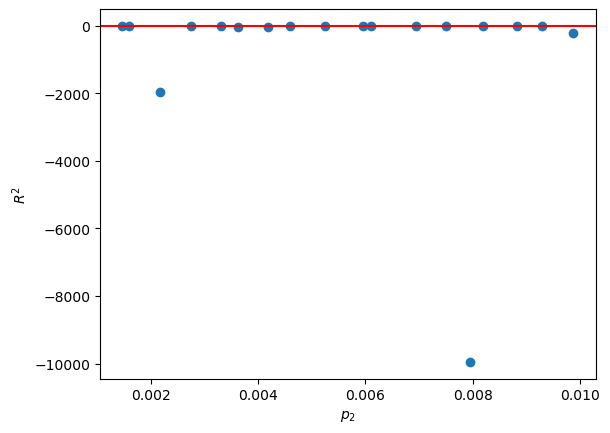

In [151]:
fig, ax = plt.subplots()


#ax.scatter(latent[:,0],R2.mean(axis=1)[:,0]-R2_out.detach().numpy()[:,0])
#ax.scatter(latent[:,0],R2.mean(axis=1)[:,1]-R2_out.detach().numpy()[:,1])
ax.scatter(latent[:,1],R2.mean(axis=1)[:,0]-R2_out.detach().numpy()[:,0])
#ax.scatter(latent[:,1],R2.mean(axis=1)[:, 0])
plt.axhline(y=0, color='r', linestyle='-')
#ax.scatter(latent[9:,0],R2_out.detach().numpy()[9:,2])

#ax.scatter(latent,R2.mean(axis=1)[:,1])
#ax.scatter(latent,R2_out.detach().numpy()[:,1])

#ax.scatter(latent,R2.mean(axis=1)[:,2])
#ax.scatter(latent,R2_out.detach().numpy()[:,2])

#plt.errorbar(latent,R2.mean(axis=1)[:,0],fmt='o',yerr=R2.std(axis=1)[:,0])


#ax.scatter(latent,R2.mean(axis=1)[:,1])
#plt.errorbar(latent,R2.mean(axis=1)[:,1],fmt='o',yerr=R2.std(axis=1)[:,1])


#ax.scatter(latent,R2.mean(axis=1)[:,2])
#plt.errorbar(latent,R2.mean(axis=1)[:,2],fmt='o',yerr=R2.std(axis=1)[:,2])



plt.xlabel('$p_2$')
plt.ylabel('$R^2$')

Text(0, 0.5, '$R^2$')

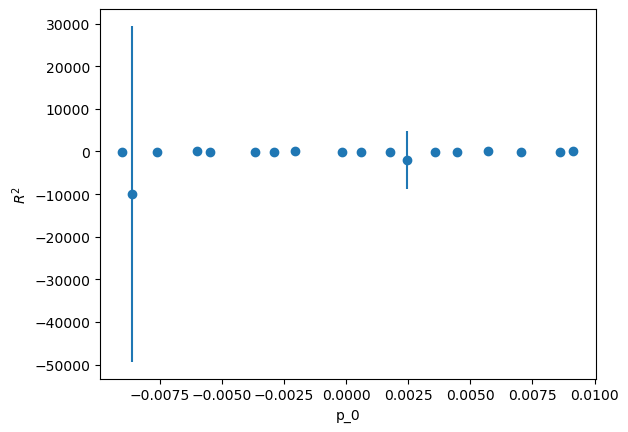

In [152]:

ax.scatter(latent[:,0],R2.mean(axis=1)[:,0])
plt.errorbar(latent[:,0],R2.mean(axis=1)[:,0],fmt='o',yerr=R2.std(axis=1)[:,0])



plt.xlabel('p_0')
plt.ylabel('$R^2$')
#plt.yscale('log')

In [153]:
def proxy(a,y_train,m0,output):
    a=torch.tensor(a)
    res = ((a*m0-y_train)**2).mean(axis=1).detach().numpy()
    return res[output]

In [154]:
X0 = torch.tensor(inputs[0])
Y0 = torch.tensor(outputs[0])[:,None]

inputData_1 = inputs[1]
outputData_1 = outputs[1]

X1 = torch.tensor(inputData_1)
Y1 = torch.tensor(outputData_1)[:,None]
# split original dataset in training, validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X1,
    Y1,
    test_size=0.1,
    random_state=seed
)

emulator_0 = GPE.ensemble(X0,Y0,mean_func="linear",training_iter=500)

0


In [155]:
#b=np.random.choice(range(X_train.shape[0]),18,replace=False)
p = int(X0.shape[0]*0.05)
n = int(X0.shape[0]/p)
m = 18
MSE = np.zeros((n,m,1))
R2 = np.zeros((n,m,1))
reps = 5
for i in range(n):
    for k in range(m):
        for j in range(reps):
            b=np.random.choice(range(X_train.shape[0]),(k+1)*p,replace=False)
            a=np.random.choice(range(X0.shape[0]),(i+1)*p,replace=False)
            emulator_0 = GPE.ensemble(X0[a,:],Y0[a,:],mean_func="linear",training_iter=500)
            m0 = emulator_0.predict(X_train[b,:])
            y_adjust = torch.tensor(y_train[b] - m0)
            delta_1 = GPE.ensemble(X_train[b,:],y_adjust,mean_func="linear",training_iter=500)
            MSE[i,k] += np.sqrt(((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy())/reps
            R2[i,k] += (1-((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0)/torch.tensor(y_test.var(axis=0))).detach().numpy()/reps


0


/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_34446/3172062991.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_adjust = torch.tensor(y_train[b] - m0)


0


/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_34446/3172062991.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  MSE[i,k] += np.sqrt(((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy())/reps
/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_34446/3172062991.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  R2[i,k] += (1-((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0)/torch.tensor(y_test.var(axis=0))).detach().numpy()/reps


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


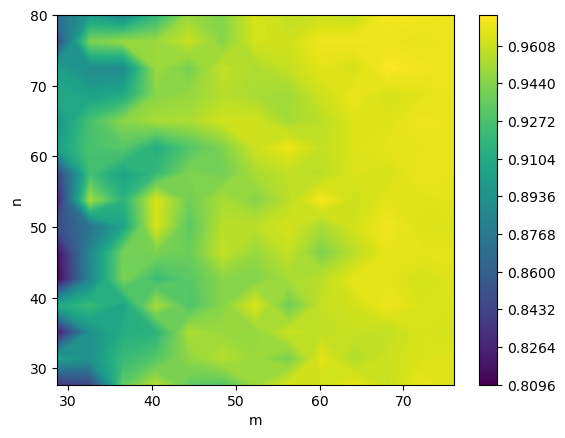

In [156]:
x = np.linspace(9,76,18)

x

y = np.linspace(9,80,20)

y

xx,yy=np.meshgrid(x,y)

xx[1:,1:].shape

level = 5

plt.contourf(xx[level:,level:],yy[level:,level:],R2[level:,level:,0],origin='lower',levels=500)
plt.ylabel('n')
plt.xlabel('m')
plt.colorbar()

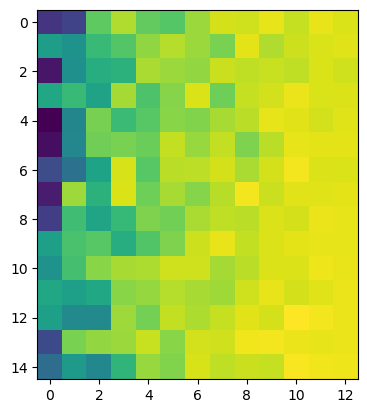

In [157]:
plt.imshow(R2[level:,level:,0])

In [158]:
R2.shape

(20, 18, 1)

In [159]:
#b=np.random.choice(range(X_train.shape[0]),18,replace=False)
p = int(X0.shape[0]*0.05)
n = int(X0.shape[0]/p)
m = 18
MSE_a = np.zeros((n,m,1))
R2_a = np.zeros((n,m,1))
reps = 5
for i in range(n):
    for k in range(m):
        for j in range(reps):
            b=np.random.choice(range(X_train.shape[0]),(k+1)*p,replace=False)
            a=np.random.choice(range(X0.shape[0]),(i+1)*p,replace=False)
            emulator_0 = GPE.ensemble(X0[a,:],Y0[a,:],mean_func="linear",training_iter=500)
            m0 = emulator_0.predict(X_train[b,:])
            a_d=np.zeros(y_train.shape[1])
            for l in range(y_train.shape[1]):
                result = scipy.optimize.minimize(proxy, 1, args=(y_train[b,:],m0,l), method='Nelder-Mead', tol=1e-8)
                print(result.x)
                a_d[l]=result.x

            a_d=torch.tensor(a_d)
            print(a_d)
            
            y_adjust = torch.tensor(y_train[b] - a_d*m0)
            delta_1 = GPE.ensemble(X_train[b,:],y_adjust,mean_func="linear",training_iter=500)
            MSE_a[i,k,:] += np.sqrt(((a_d*emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy())/reps
            R2_a[i,k,:] += (1-((a_d*emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0)/torch.tensor(y_test.var(axis=0))).detach().numpy()/reps

0
[-1.19167891]
tensor([-1.1917], dtype=torch.float64)
0


/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_34446/1148931251.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_adjust = torch.tensor(y_train[b] - a_d*m0)
/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_34446/1148931251.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  MSE_a[i,k,:] += np.sqrt(((a_d*emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy())/reps
/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_34446/1148931251.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than

0
[-0.0669762]
tensor([-0.0670], dtype=torch.float64)
0
0
[-0.18272064]
tensor([-0.1827], dtype=torch.float64)
0
0
[0.19173636]
tensor([0.1917], dtype=torch.float64)
0
0
[0.11110898]
tensor([0.1111], dtype=torch.float64)
0
0
[-0.31740689]
tensor([-0.3174], dtype=torch.float64)
0
0
[0.83489364]
tensor([0.8349], dtype=torch.float64)
0
0
[-0.15627773]
tensor([-0.1563], dtype=torch.float64)
0
0
[0.76439663]
tensor([0.7644], dtype=torch.float64)
0
0
[0.19065446]
tensor([0.1907], dtype=torch.float64)
0
0
[0.07593647]
tensor([0.0759], dtype=torch.float64)
0
0
[0.59484071]
tensor([0.5948], dtype=torch.float64)
0
0
[-0.9144483]
tensor([-0.9144], dtype=torch.float64)
0
0
[0.15316007]
tensor([0.1532], dtype=torch.float64)
0
0
[0.14070603]
tensor([0.1407], dtype=torch.float64)
0
0
[0.08991808]
tensor([0.0899], dtype=torch.float64)
0
0
[0.0967914]
tensor([0.0968], dtype=torch.float64)
0
0
[0.04098684]
tensor([0.0410], dtype=torch.float64)
0
0
[0.11854289]
tensor([0.1185], dtype=torch.float64)
0
0
[

0
[0.22404181]
tensor([0.2240], dtype=torch.float64)
0
0
[0.03226486]
tensor([0.0323], dtype=torch.float64)
0
0
[0.14472575]
tensor([0.1447], dtype=torch.float64)
0
0
[0.25155258]
tensor([0.2516], dtype=torch.float64)
0
0
[0.13446386]
tensor([0.1345], dtype=torch.float64)
0
0
[0.08999323]
tensor([0.0900], dtype=torch.float64)
0
0
[-2.07241516]
tensor([-2.0724], dtype=torch.float64)
0
0
[0.41116736]
tensor([0.4112], dtype=torch.float64)
0
0
[0.11652427]
tensor([0.1165], dtype=torch.float64)
0
0
[0.45516013]
tensor([0.4552], dtype=torch.float64)
0
0
[0.0353657]
tensor([0.0354], dtype=torch.float64)
0
0
[0.15915181]
tensor([0.1592], dtype=torch.float64)
0
0
[0.91733015]
tensor([0.9173], dtype=torch.float64)
0
0
[0.16368784]
tensor([0.1637], dtype=torch.float64)
0
0
[0.08832462]
tensor([0.0883], dtype=torch.float64)
0
0
[0.23597957]
tensor([0.2360], dtype=torch.float64)
0
0
[0.22704077]
tensor([0.2270], dtype=torch.float64)
0
0
[0.23305489]
tensor([0.2331], dtype=torch.float64)
0
0
[0.1390

0
[0.08372643]
tensor([0.0837], dtype=torch.float64)
0
0
[0.14839771]
tensor([0.1484], dtype=torch.float64)
0
0
[0.04915013]
tensor([0.0492], dtype=torch.float64)
0
0
[0.82333984]
tensor([0.8233], dtype=torch.float64)
0
0
[0.69437355]
tensor([0.6944], dtype=torch.float64)
0
0
[0.06740674]
tensor([0.0674], dtype=torch.float64)
0
0
[0.27492942]
tensor([0.2749], dtype=torch.float64)
0
0
[0.14782223]
tensor([0.1478], dtype=torch.float64)
0
0
[0.77760974]
tensor([0.7776], dtype=torch.float64)
0
0
[0.53149485]
tensor([0.5315], dtype=torch.float64)
0
0
[0.06341093]
tensor([0.0634], dtype=torch.float64)
0
0
[0.05792519]
tensor([0.0579], dtype=torch.float64)
0
0
[0.08147045]
tensor([0.0815], dtype=torch.float64)
0
0
[0.76251802]
tensor([0.7625], dtype=torch.float64)
0
0
[0.39989981]
tensor([0.3999], dtype=torch.float64)
0
0
[0.12549959]
tensor([0.1255], dtype=torch.float64)
0
0
[0.18905439]
tensor([0.1891], dtype=torch.float64)
0
0
[0.63675305]
tensor([0.6368], dtype=torch.float64)
0
0
[0.26517

0
[0.2521785]
tensor([0.2522], dtype=torch.float64)
0
0
[0.20217509]
tensor([0.2022], dtype=torch.float64)
0
0
[0.23424571]
tensor([0.2342], dtype=torch.float64)
0
0
[0.30592029]
tensor([0.3059], dtype=torch.float64)
0
0
[0.62701451]
tensor([0.6270], dtype=torch.float64)
0
0
[0.09500858]
tensor([0.0950], dtype=torch.float64)
0
0
[0.08032584]
tensor([0.0803], dtype=torch.float64)
0
0
[0.08544779]
tensor([0.0854], dtype=torch.float64)
0
0
[0.12489064]
tensor([0.1249], dtype=torch.float64)
0
0
[0.05955574]
tensor([0.0596], dtype=torch.float64)
0
0
[0.58940904]
tensor([0.5894], dtype=torch.float64)
0
0
[0.08815309]
tensor([0.0882], dtype=torch.float64)
0
0
[0.19996935]
tensor([0.2000], dtype=torch.float64)
0
0
[0.08905939]
tensor([0.0891], dtype=torch.float64)
0
0
[0.4031071]
tensor([0.4031], dtype=torch.float64)
0
0
[0.10277183]
tensor([0.1028], dtype=torch.float64)
0
0
[0.1963844]
tensor([0.1964], dtype=torch.float64)
0
0
[0.64963616]
tensor([0.6496], dtype=torch.float64)
0
0
[0.15515936

[0.18989304]
tensor([0.1899], dtype=torch.float64)
0
0
[0.15097891]
tensor([0.1510], dtype=torch.float64)
0
0
[0.05952536]
tensor([0.0595], dtype=torch.float64)
0
0
[0.87214966]
tensor([0.8721], dtype=torch.float64)
0
0
[0.25963408]
tensor([0.2596], dtype=torch.float64)
0
0
[0.15257389]
tensor([0.1526], dtype=torch.float64)
0
0
[0.08107733]
tensor([0.0811], dtype=torch.float64)
0
0
[0.36091337]
tensor([0.3609], dtype=torch.float64)
0
0
[0.2065024]
tensor([0.2065], dtype=torch.float64)
0
0
[0.11359671]
tensor([0.1136], dtype=torch.float64)
0
0
[0.05904836]
tensor([0.0590], dtype=torch.float64)
0
0
[0.23379815]
tensor([0.2338], dtype=torch.float64)
0
0
[0.22853228]
tensor([0.2285], dtype=torch.float64)
0
0
[0.10965818]
tensor([0.1097], dtype=torch.float64)
0
0
[0.36292742]
tensor([0.3629], dtype=torch.float64)
0
0
[0.08170578]
tensor([0.0817], dtype=torch.float64)
0
0
[0.13321905]
tensor([0.1332], dtype=torch.float64)
0
0
[-0.02717799]
tensor([-0.0272], dtype=torch.float64)
0
0
[0.135586

0
[0.16954858]
tensor([0.1695], dtype=torch.float64)
0
0
[0.31642421]
tensor([0.3164], dtype=torch.float64)
0
0
[0.27216924]
tensor([0.2722], dtype=torch.float64)
0
0
[0.25637255]
tensor([0.2564], dtype=torch.float64)
0
0
[0.11612729]
tensor([0.1161], dtype=torch.float64)
0
0
[0.14788716]
tensor([0.1479], dtype=torch.float64)
0
0
[0.12817932]
tensor([0.1282], dtype=torch.float64)
0
0
[-4.00288373]
tensor([-4.0029], dtype=torch.float64)
0
0
[0.38781435]
tensor([0.3878], dtype=torch.float64)
0
0
[0.24641014]
tensor([0.2464], dtype=torch.float64)
0
0
[0.22032639]
tensor([0.2203], dtype=torch.float64)
0
0
[0.14856066]
tensor([0.1486], dtype=torch.float64)
0
0
[0.35517749]
tensor([0.3552], dtype=torch.float64)
0
0
[0.15199274]
tensor([0.1520], dtype=torch.float64)
0
0
[0.06767777]
tensor([0.0677], dtype=torch.float64)
0
0
[0.11983436]
tensor([0.1198], dtype=torch.float64)
0
0
[0.0986007]
tensor([0.0986], dtype=torch.float64)
0
0
[0.28251415]
tensor([0.2825], dtype=torch.float64)
0
0
[0.1499

0
[0.1301069]
tensor([0.1301], dtype=torch.float64)
0
0
[0.39579321]
tensor([0.3958], dtype=torch.float64)
0
0
[0.06835564]
tensor([0.0684], dtype=torch.float64)
0
0
[0.15410274]
tensor([0.1541], dtype=torch.float64)
0
0
[0.16570626]
tensor([0.1657], dtype=torch.float64)
0
0
[0.06820164]
tensor([0.0682], dtype=torch.float64)
0
0
[0.19272339]
tensor([0.1927], dtype=torch.float64)
0
0
[0.43705257]
tensor([0.4371], dtype=torch.float64)
0
0
[0.5840138]
tensor([0.5840], dtype=torch.float64)
0
0
[0.14801093]
tensor([0.1480], dtype=torch.float64)
0
0
[0.61622343]
tensor([0.6162], dtype=torch.float64)
0
0
[0.20521879]
tensor([0.2052], dtype=torch.float64)
0
0
[0.6393464]
tensor([0.6393], dtype=torch.float64)
0
0
[0.41439378]
tensor([0.4144], dtype=torch.float64)
0
0
[0.61365393]
tensor([0.6137], dtype=torch.float64)
0
0
[0.77089926]
tensor([0.7709], dtype=torch.float64)
0
0
[0.07879291]
tensor([0.0788], dtype=torch.float64)
0
0
[0.38780708]
tensor([0.3878], dtype=torch.float64)
0
0
[0.06788993

0
[0.45566611]
tensor([0.4557], dtype=torch.float64)
0
0
[0.12447799]
tensor([0.1245], dtype=torch.float64)
0
0
[0.68189756]
tensor([0.6819], dtype=torch.float64)
0
0
[0.28642654]
tensor([0.2864], dtype=torch.float64)
0
0
[0.06232686]
tensor([0.0623], dtype=torch.float64)
0
0
[0.32674071]
tensor([0.3267], dtype=torch.float64)
0
0
[0.69067903]
tensor([0.6907], dtype=torch.float64)
0
0
[0.09951997]
tensor([0.0995], dtype=torch.float64)
0
0
[0.12440426]
tensor([0.1244], dtype=torch.float64)
0
0
[0.14625868]
tensor([0.1463], dtype=torch.float64)
0
0
[0.14212192]
tensor([0.1421], dtype=torch.float64)
0
0
[0.06208557]
tensor([0.0621], dtype=torch.float64)
0
0
[0.42823745]
tensor([0.4282], dtype=torch.float64)
0
0
[0.09340641]
tensor([0.0934], dtype=torch.float64)
0
0
[0.22415054]
tensor([0.2242], dtype=torch.float64)
0
0
[0.16634833]
tensor([0.1663], dtype=torch.float64)
0
0
[0.57901987]
tensor([0.5790], dtype=torch.float64)
0
0
[0.14100059]
tensor([0.1410], dtype=torch.float64)
0
0
[-0.7841

0
[0.14732157]
tensor([0.1473], dtype=torch.float64)
0
0
[0.12865309]
tensor([0.1287], dtype=torch.float64)
0
0
[0.6214608]
tensor([0.6215], dtype=torch.float64)
0
0
[0.31035837]
tensor([0.3104], dtype=torch.float64)
0
0
[0.40212234]
tensor([0.4021], dtype=torch.float64)
0
0
[0.26625646]
tensor([0.2663], dtype=torch.float64)
0
0
[0.37306038]
tensor([0.3731], dtype=torch.float64)
0
0
[0.1701103]
tensor([0.1701], dtype=torch.float64)
0
0
[0.0794479]
tensor([0.0794], dtype=torch.float64)
0
0
[0.40182154]
tensor([0.4018], dtype=torch.float64)
0
0
[0.06474134]
tensor([0.0647], dtype=torch.float64)
0
0
[0.23459348]
tensor([0.2346], dtype=torch.float64)
0
0
[0.24519981]
tensor([0.2452], dtype=torch.float64)
0
0
[0.69352825]
tensor([0.6935], dtype=torch.float64)
0
0
[0.60931956]
tensor([0.6093], dtype=torch.float64)
0
0
[0.29191204]
tensor([0.2919], dtype=torch.float64)
0
0
[0.19248059]
tensor([0.1925], dtype=torch.float64)
0
0
[0.08067956]
tensor([0.0807], dtype=torch.float64)
0
0
[0.0832655]

0
[0.26354426]
tensor([0.2635], dtype=torch.float64)
0
0
[0.06998277]
tensor([0.0700], dtype=torch.float64)
0
0
[0.14827998]
tensor([0.1483], dtype=torch.float64)
0
0
[0.18984154]
tensor([0.1898], dtype=torch.float64)
0
0
[0.63279945]
tensor([0.6328], dtype=torch.float64)
0
0
[0.56664403]
tensor([0.5666], dtype=torch.float64)
0
0
[0.11226579]
tensor([0.1123], dtype=torch.float64)
0
0
[0.39294591]
tensor([0.3929], dtype=torch.float64)
0
0
[0.70613798]
tensor([0.7061], dtype=torch.float64)
0
0
[0.3182929]
tensor([0.3183], dtype=torch.float64)
0
0
[0.30829523]
tensor([0.3083], dtype=torch.float64)
0
0
[0.40240848]
tensor([0.4024], dtype=torch.float64)
0
0
[0.31639915]
tensor([0.3164], dtype=torch.float64)
0
0
[0.68159528]
tensor([0.6816], dtype=torch.float64)
0
0
[0.67799451]
tensor([0.6780], dtype=torch.float64)
0
0
[0.09956115]
tensor([0.0996], dtype=torch.float64)
0
0
[0.11375908]
tensor([0.1138], dtype=torch.float64)
0
0
[0.67927545]
tensor([0.6793], dtype=torch.float64)
0
0
[0.265214

0
[0.06496729]
tensor([0.0650], dtype=torch.float64)
0
0
[0.81099432]
tensor([0.8110], dtype=torch.float64)
0
0
[0.33455853]
tensor([0.3346], dtype=torch.float64)
0
0
[0.21817055]
tensor([0.2182], dtype=torch.float64)
0
0
[0.29199185]
tensor([0.2920], dtype=torch.float64)
0
0
[0.33033571]
tensor([0.3303], dtype=torch.float64)
0
0
[0.10696911]
tensor([0.1070], dtype=torch.float64)
0
0
[0.58240899]
tensor([0.5824], dtype=torch.float64)
0
0
[0.73678595]
tensor([0.7368], dtype=torch.float64)
0
0
[0.67693553]
tensor([0.6769], dtype=torch.float64)
0
0
[0.22116609]
tensor([0.2212], dtype=torch.float64)
0
0
[0.16574748]
tensor([0.1657], dtype=torch.float64)
0
0
[0.32585167]
tensor([0.3259], dtype=torch.float64)
0
0
[0.79456623]
tensor([0.7946], dtype=torch.float64)
0
0
[0.11372629]
tensor([0.1137], dtype=torch.float64)
0
0
[0.43504316]
tensor([0.4350], dtype=torch.float64)
0
0
[0.43820561]
tensor([0.4382], dtype=torch.float64)
0
0
[0.08217875]
tensor([0.0822], dtype=torch.float64)
0
0
[0.54458

0
[0.06933808]
tensor([0.0693], dtype=torch.float64)
0
0
[0.62054589]
tensor([0.6205], dtype=torch.float64)
0
0
[0.12775848]
tensor([0.1278], dtype=torch.float64)
0
0
[0.59192328]
tensor([0.5919], dtype=torch.float64)
0
0
[0.08218857]
tensor([0.0822], dtype=torch.float64)
0
0
[0.24112197]
tensor([0.2411], dtype=torch.float64)
0
0
[0.47092568]
tensor([0.4709], dtype=torch.float64)
0
0
[0.60528471]
tensor([0.6053], dtype=torch.float64)
0
0
[0.20419849]
tensor([0.2042], dtype=torch.float64)
0
0
[0.20486417]
tensor([0.2049], dtype=torch.float64)
0
0
[0.23805617]
tensor([0.2381], dtype=torch.float64)
0
0
[0.21889669]
tensor([0.2189], dtype=torch.float64)
0
0
[0.2040373]
tensor([0.2040], dtype=torch.float64)
0
0
[0.14835361]
tensor([0.1484], dtype=torch.float64)
0
0
[0.06639497]
tensor([0.0664], dtype=torch.float64)
0
0
[0.11409708]
tensor([0.1141], dtype=torch.float64)
0
0
[0.73899465]
tensor([0.7390], dtype=torch.float64)
0
0
[0.21310812]
tensor([0.2131], dtype=torch.float64)
0
0
[0.065395

0
[0.08245656]
tensor([0.0825], dtype=torch.float64)
0
0
[0.60680691]
tensor([0.6068], dtype=torch.float64)
0


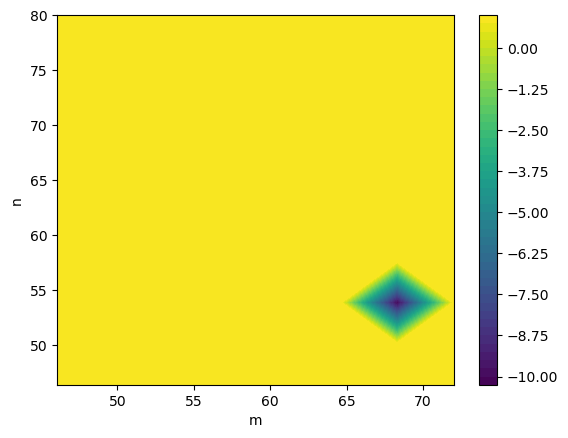

In [160]:
x = np.linspace(9,72,18)

x

y = np.linspace(9,80,20)

y

xx,yy=np.meshgrid(x,y)

xx[1:,1:].shape

level = 10

plt.contourf(xx[level:,level:],yy[level:,level:],R2_a[level:,level:,0],origin='lower',levels=50)
plt.ylabel('n')
plt.xlabel('m')
plt.colorbar()

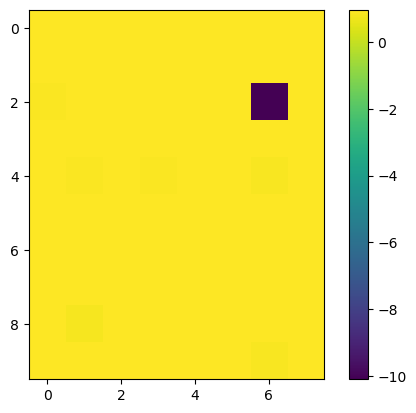

In [161]:
plt.imshow(R2_a[level:,level:,0])
plt.colorbar()

In [162]:
R2_a

array([[[  0.2269043 ],
        [ -0.63259759],
        [  0.41406026],
        [  0.66492431],
        [  0.48996595],
        [  0.83579486],
        [  0.88411244],
        [  0.75265474],
        [  0.78390249],
        [  0.88092377],
        [  0.77692347],
        [  0.91220956],
        [  0.7803291 ],
        [  0.6459181 ],
        [  0.95065502],
        [  0.83482884],
        [  0.94933996],
        [  0.95069846]],

       [[ -0.38540425],
        [  0.13682617],
        [  0.29383991],
        [  0.71342661],
        [  0.68961298],
        [  0.85326415],
        [  0.88583945],
        [  0.89085275],
        [  0.92164454],
        [  0.86232007],
        [  0.92355538],
        [  0.90891979],
        [  0.93339911],
        [  0.82451488],
        [  0.93672419],
        [  0.9488322 ],
        [  0.93052003],
        [  0.95640864]],

       [[ -0.35111155],
        [  0.49239996],
        [  0.75131559],
        [  0.70749745],
        [  0.83638838],
        [  0

In [163]:
18*4

72

In [164]:

ax.scatter(latent[:,1],R2.mean(axis=1)[:,1])
plt.errorbar(latent[:,1],R2.mean(axis=1)[:,0],fmt='o',yerr=R2.std(axis=1)[:,0])


ax.scatter(latent[:,1],R2.mean(axis=1)[:,1])
plt.errorbar(latent[:,1],R2.mean(axis=1)[:,1],fmt='o',yerr=R2.std(axis=1)[:,1])


ax.scatter(latent[:,1],R2.mean(axis=1)[:,2])
plt.errorbar(latent[:,1],R2.mean(axis=1)[:,2],fmt='o',yerr=R2.std(axis=1)[:,2])


plt.legend(['dif','end','mean'])
plt.xlabel('End Time')
plt.ylabel('$R^2$')
#plt.yscale('log')

IndexError: index 1 is out of bounds for axis 1 with size 1